# PHYS 210 Lecture 17 - Nov 03, 2024
Agenda:

1. Announcements
1. Preclass recap, polling questions and Q&A
1. Group Worksheet 17

## UBC Physics Society - Beef and Pizza - Wednesday 11am-2pm, outside HENN 200 or inside HENN 307! 
* Got some beef with your Physics or Astronomy classes? Or maybe some thoughts about the PHAS degree or department you want to share?
* Want to exchange them for some free pizza?
* This is your chance to share feedback about the PHAS courses, labs, degree program, or the department in general, and enjoy some free pizza while you are at it. 
* Let's make PHAS better, one slice at a time!

## Tu/Th office hours moving to 4:30-6:00pm 
To have less conflict with Phys 219 lab sections

## Project 03 details were posted
* Due date for Homework 17 is end of class on Wednesday, so you can work on that in class if you like
* Peer feedback assignment due the Monday after the break

## Preclass recap, "polling" questions and Q&A

### Recap of Markov Chain Monte Carlo and the Metropolis probability


**Group Q16.1:** 
What are the conditions for each of the following?

1. p = 0<br>
1. 0 < p < 1<br>
1. p = 1<br>
1.  p > 1<br>

In [ ]:
# dE = xf**2 - xi**2
# p = np.exp(-dE / kT) # Metropolis probability

# A. very big dE
# B. xf > xi
# C. xf = xi
# D. xf < xi
# E. Other

**A different example:** We model an ideal gas as a collection of non-interacting atoms inside a box of length $L$. Like you have likely encountered with the Bohr atom, the energy of such an atom goes like $n^2$, where $n$ is the principal quantum number, which can only take on values of 1, 2, 3, ...

We choose a system of units with $m = L = \hbar = 1$. Formally, the energy of each atom, of mass $m$ is

$$E(n) = \frac{\pi^2 \hbar^2}{2 m L}n^2 = \frac{\pi^2}{2}n^2,$$



**The approach for one atom**
1. **Initialization**: Start with an atom in an initial quantum state of $n=1$.
2. **Proposal**: Propose a move to change to a new state based on the current one (atom will try to increase or decrease its energy). These moves are proposed with equal probability, even if they are not accepted with equal probability
3. **Acceptance**: Accept all moves that would <u>decrease</u> the energy of the system from an excited state $n>1$. Reject a move that would try to <u>decrease</u> the energy of the ground state ($n=1$). Accept a move that would <u>increase</u> the energy of the system according to the Metropolis probability.
4. **Iteration**: Iterate 200 times.

In [1]:
# The one atom ideal gas
import numpy as np

def delta_energy(ni, nf):
    return np.pi**2 / 2 * (nf**2 - ni**2)

Temp = 20 # k_B*T
Nsteps = 200 # Number of steps

# Inital quantum state and energy
n = 1
E = n**2 * np.pi**2 / 2

E_t = np.zeros(Nsteps) # Store E(t)

In [2]:
for j in range(Nsteps):

    # The proposed move
    dn = np.random.choice([-1, 1])       

    # dE for proposed move
    dE = delta_energy( n , n+dn )
    
    # Decide whether to accept the move
    if not (n == 1 and dn == -1): # Can't move down
        if np.random.random() < np.exp(-dE/Temp):
            n += dn
            E += dE
    
    E_t[j] = E

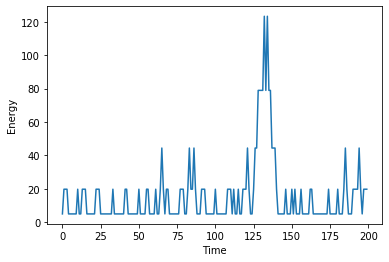

In [3]:
import matplotlib.pyplot as plt

# Make the graph
plt.plot(E_t)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()

### Now, we look at the multi-atom gas

In [4]:
Temp = 20 # k_B*T
Nsteps = 50000 
Natoms = 1000

n = np.ones(Natoms) # Initial states for Natoms

E = Natoms * np.pi**2 / 2 # Initial energy of system

# Array to store the energy evolution over time
E_t = np.zeros(Nsteps)

In [5]:
for j in range(Nsteps):

    # Choose which atom will have the proposed move
    atom = np.random.randint(Natoms)
    
    # The proposed move
    dn = np.random.choice([-1, 1])       

    # dE for proposed moveu
    dE = delta_energy( n[atom] , n[atom]+dn )
    
    # Decide whether to accept the move
    if not (n[atom] == 1 and dn == -1): # Can't move down
        if np.random.random() < np.exp(-dE/Temp):
            n[atom] += dn
            E += dE
    
    E_t[j] = E

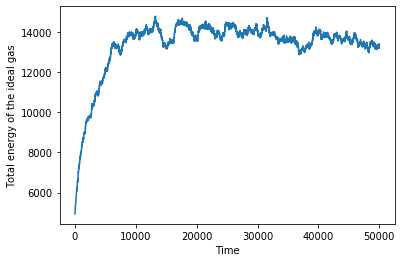

In [6]:
# Make the graph
plt.plot(E_t)
plt.xlabel("Time")
plt.ylabel("Total energy of the ideal gas")
plt.show()